# **AP155 Lab Assignment**
## Module 6: Random Process and Monte Carlo Methods

_Instructions_: Answer each problem as completely as you can. Discuss **all** your answers as clearly and concisely as possible.

_Scoring Criteria_: 50% - *correctness of code*; 50% - *discussion of the code and results*. Maximum score is **100 points**.


### Student Information

_Full Name (Last Name, First Name)_: Chua, Winonna Kylie\
_Student No._: 2022-09120\
_Section_: THV-TX-2

### Submission Information

_Date and Time Submitted (most recent upload)_: November 30, 2024 | 11:40 P.M.

**HONOR PLEDGE** I affirm that I have upheld the highest principles of honesty and integrity in my academic work and that this lab assignment is my own work.

**Sign here with your full name: Winonna Kylie C Chua**

### Grading Information (c/o Lab Instructor)

TOTAL SCORE: <font color='red'>**100/100**</font>

Score breakdown:
* Problem 1 - <font color='red'>**100/100**</font>

<font color='red'>**signed GC Belinario**</font>

### PROBLEM 1

**The Ising model**

_Refer to Exercise 10.9 in the Newman text._ The Ising model is a theoretical model of a magnet. The magnetic potential energy due to the interaction of two dipoles is proportional to their dot product, but in the Ising model this simplifies to just the product $s_i s_j$ for spins on sites $i$ and $j$ of the lattice, since the spins are one-dimensional scalars, not vectors. Then the actual energy of interaction is $-Js_i s_j$, where $J$ is a positive interaction constant. The minus sign ensures that the in- teractions are ferromagnetic, meaning the energy is lower when dipoles are lined up. A ferromagnetic interaction implies that the material will magnetize if given the chance.

Normally it is assumed that spins interact only with those that are immediately adjacent to them on the lattice, which gives a total energy for the entire system equal to
$$ E = -J \sum_{\langle ij \rangle} s_i s_j,$$
where the notation $\langle ij \rangle$ indicates a sum over pairs $i,j$ that are adjacent on the lattice. On the square lattice we use in this exercise each spin has four adjacent neighbors with which it interacts, except for the spins at the edges of the lattice, which have either two or three neighbors.

Perform a Markov chain Monte Carlo simulation of the Ising model on the square lattice for a system of 20 x 20 spins. You will need to set up variables to hold the value ±1 of the spin on each lattice site, probably using a two-dimensional integer array, and then take the following steps.

1. Write a function to calculate the total energy of the system, as given by the equation above. That is, for a given array of values of the spins, go through every pair of adjacent spins and add up the contributions $s_i s_j$ from all of them, then multiply by $-J$. Hint 1: Each unique pair of adjacent spins crops up only once in the sum. Thus there is a term $-Js_1s_2$ if spins 1 and 2 are adjacent to one another, but you do not also need a term $-Js_2s_1$. Hint 2: To make your final program to run in a reasonable amount of time, you will find it helpful if you can work out a way to calculate the energy using Python's ability to do arithmetic with entire arrays at once. If you do the calculation step by step, your program will be significantly slower. *(25 pts.)*

2. Now use your function as the basis for a Metropolis-style simulation of the Ising model with $J = 1$ and temperature $T = 1$ in units where the Boltzmann constant $k_B$ is also 1. Initially set the spin variables randomly to ±1, so that on average about a half of them are up and a half down, giving a total magneti- zation of roughly zero. Then choose a spin at random, flip it, and calculate the new energy after it is flipped, and hence also the change in energy as a result of the flip. Then decide whether to accept the flip using the Metropolis acceptance formula, Eq. (10.60). If the move is rejected you will have to flip the spin back to where it was. Otherwise you keep the flipped spip. Now repeat this process for many moves. *(25 pts.)*

3. Make a plot of the total magnetization $M = \sum_i s_i$ of the system as a function of time for a million Monte Carlo steps. You should see that the system develops a "spontaneous magnetization," a nonzero value of the overall magnetization. Hint: While you are working on your program, do shorter runs, of maybe ten thousand steps at a time. Once you have it working properly, do a longer run of a million steps to get the final results. *(25 pts.)*

4. Run your program several times and observe the sign of the magnetization that develops, positive or negative. Describe what you find and give a brief explana- tion of what is happening. *(25 pts.)*

### **BACKGROUND**


### *Change in Total Energy*
The total energy of the system is given by:
$$E = -J \sum_{ij}s_{i}s_{j}$$
wherein $J$ is the interaction constant, and $s_{i}$ and $s_{j}$ are the spin values of the neighboring spins i and j, respectively. Due to the spin flip, expressed as $$s_{ij} = s_{ij} \cdot (-1)\,,$$ we have
$$E_i = -J (2s_{ij}s_{i, j-1} + 2s_{ij}s_{i, j+1} )$$
$$E_f = -J (-2s_{ij}s_{i-1, j} - 2s_{ij}s_{i+1, j} )$$
$$\Delta E = E_f - E_i = -J(-2s_{ij}s_{i-1, j} - 2s_{ij}s_{i+1, j} - 2s_{ij}s_{i, j-1} - 2s_{ij}s_{i, j+1})\,.$$
### *Change in Total Magnetization*
The total magnetization of the system is given by: $$M = \sum_{ij}^{N} s_{ij}$$
wherein $s_{ij}$ is the spin at lattice site ij.
Since the spin flip is given by
$$s_{ij} = s_{ij} \cdot (-1)\,,$$
we have
$$M_i = s_{ij}$$
$$M_f = - s_{ij}$$
$$\Delta M = M_f - M_i = -2s_{ij}\,.$$

### *Metropolis acceptance formula*
Eq. (10.60) is given by
$$P_{a} = \begin{cases}
1 & E_{j} \leq E_{i}\\
e^{-\beta (\Delta E)} & E_{j} > E_{i}
\end{cases}
$$
which can also be expressed as
$$P_{a} = \begin{cases}
1 & \Delta E \leq 0\\
e^{-\beta (\Delta E)} & \Delta E > 0
\end{cases}
$$

In this formula, we see the criteria in accepting or rejecting change in the system. Specifically, if the change the lowers the energy of the system, then it would be accepted. However, is the change increases the energy in the system, it would be accepted with a probability. In particular, the probability is related directly to temperature and inversely to the change in energy.

### **CODE**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from random import random, randint
from math import e

# Constants
N = 20                 # dimension of the lattice
T = 1                  # temperature of system
J = 1                  # interaction constant
k_B = 1                # Boltzmann constant
steps = 1000000        # number of steps for simulation

# Function to generate a new states of the Ising model
def state_n(N, seed):
  rng = np.random.default_rng(seed)                       # new random number generator with a specified seed
  return (rng.integers(0, 2, size = (N, N)) - 0.5) * 2    # generates an N x N array of spins (+1 / -1)

# Function to calculate the total energy of the system
def energy_total(arr):
  N = arr[0].size                                          # size of the lattice
  sum = 0                                                  # starting point (initialization)
  for i in range(N-1):                                     # accounts for the interactions between adjacent spins
    sum += arr[i,:] @ arr[i+1,:] + arr[:,i] @ arr[:,i+1]
  return -J * sum

# Function to calculate the total magnetization of the system
def magnet_total(arr):
  return np.sum(arr)

# Markov chain Monte Carlo (MCMC) simulation of Ising model (with seed = 777)
def MCMC(spin_arr, J, T, steps, seed = 777):
  beta = 1/(k_B * T)                          # thermodynamic beta / Boltzmann probability constant

  rng = np.random.default_rng(seed)           # new random number generator with a specified seed

  spin = np.copy(spin_arr)                    # creates a copy of the spin array
  N = spin[0].size                            # size of the lattice

  M_total = magnet_total(spin)                # calculates the total magnetization of the initial state
  M_arr = [M_total]                           # list to store values of total magnetization

  for i in range(steps):                           # used to identify the spin that will be considered for spin flip
    x, y = rng.integers(0, N), rng.integers(0, N)

    spin[x, y] *= -1                               # applies random spin flip

    # Solve for change in magnetization of new state
    delta_magnet = spin[x, y] * 2

    # Solve for change in energy of new state
    delta_energy = 0

    delta_energy += spin[x-1, y] if x > 0 else 0        # change in energy wrt neighbor to the left
    delta_energy += spin[x+1, y] if x < N-1 else 0      # change in energy wrt neighbor to the right
    delta_energy += spin[x, y-1] if y > 0 else 0        # change in energy wrt neighbor above
    delta_energy += spin[x, y+1] if y < N-1 else 0      # change in energy wrt neighbor below
    delta_energy *= -2 * J * spin[x, y]                 # finalizes calculation of change in energy

    # Criteria to decide whether or not to accept the new state (based on the acceptance probability)
    if (delta_energy):
      if rng.random() > e**(-beta * delta_energy):
        spin[x, y] *= -1                            # go back to previous state
        delta_magnet = 0                            # do not change total magnetization
        delta_energy = 0                            # do not change total energy
    M_arr.append(M_arr[-1] + delta_magnet)          # updates the list of the values of total magnetization 'M_arr'

  return spin, M_arr    # returns the final spin configuration and all the values of total magnetization


### **Multiple Runs of MCMC Simulation**




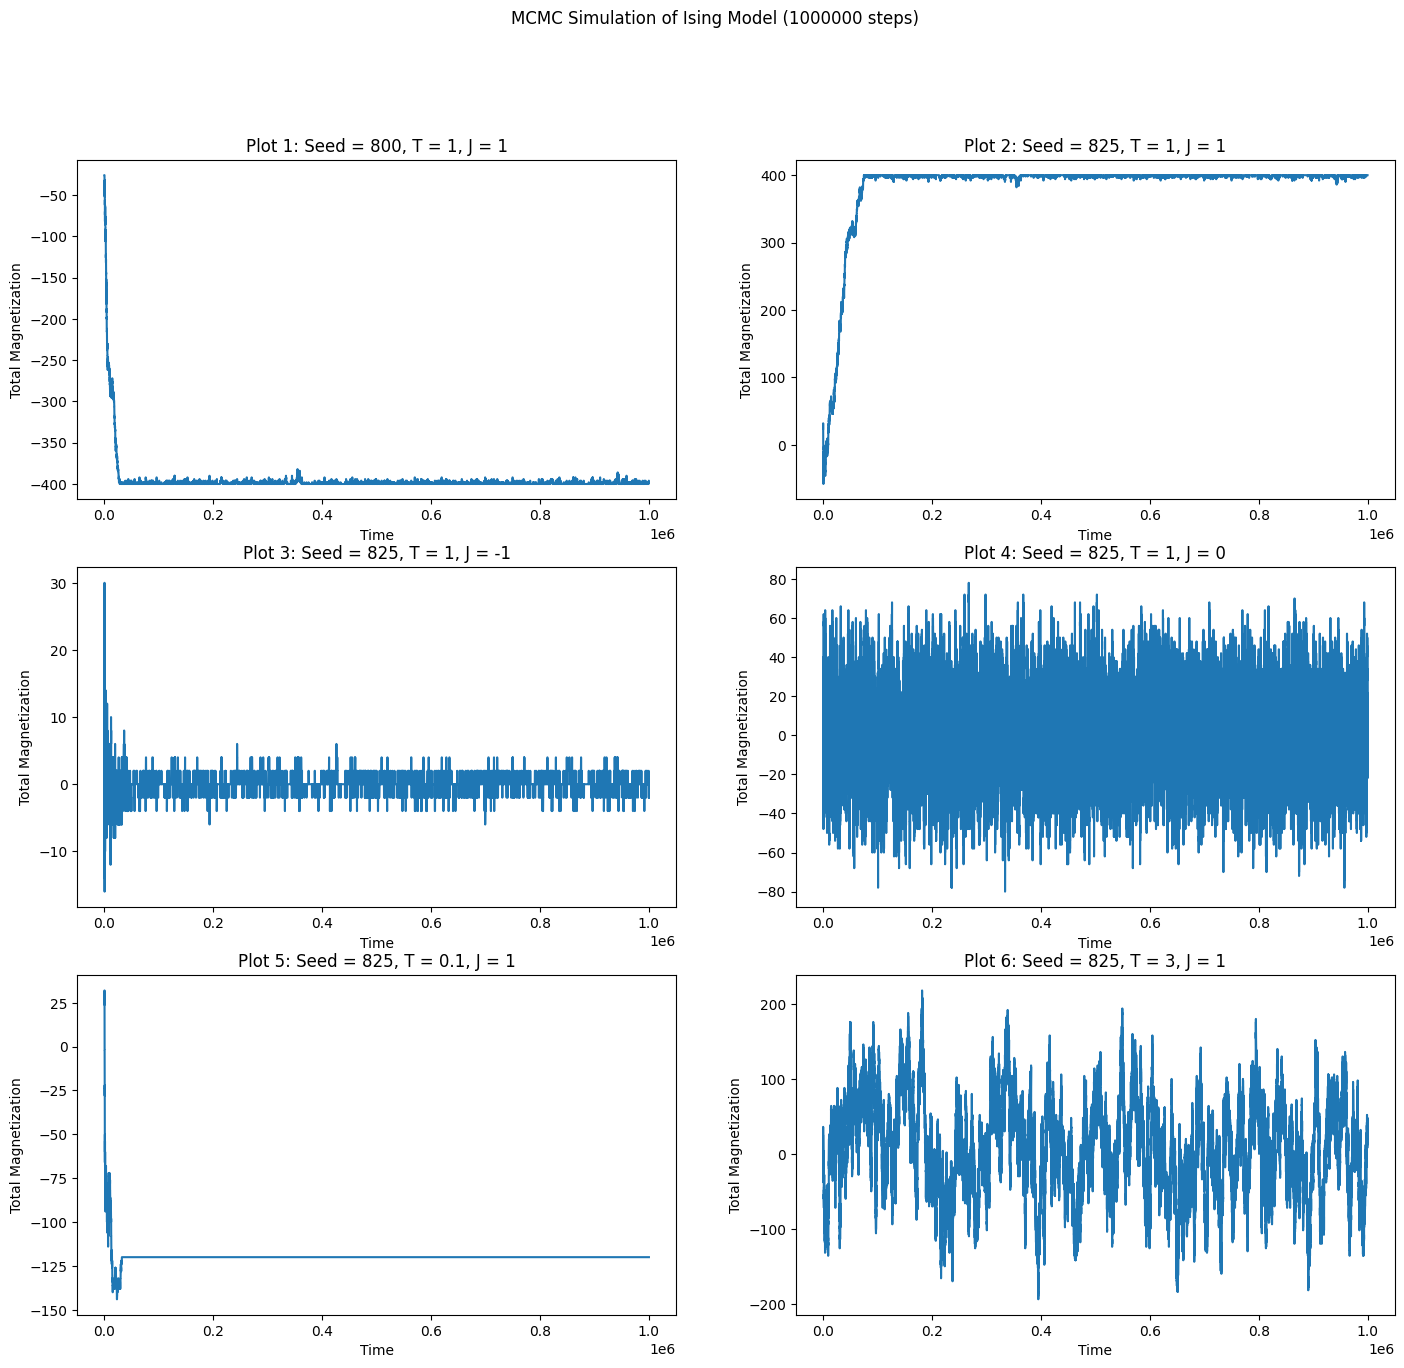

In [ ]:
# RUN 1

# Generate a new state with seed = 800
spin_00 = state_n(N, 800)
# Run MCMC simulation with T = 1, J = 1, steps = 1000000
spin_0, M_arr0 = MCMC(spin_00, 1, 1, 1000000)


# RUN 2

# Generate a new state with seed = 825
spin_01 = state_n(N, 825)
# Run MCMC simulation with T = 1, J = 1, steps = 1000000
spin_1, M_arr1 = MCMC(spin_01, 1, 1, 1000000)


# RUN 3

# Generate a new state with seed = 825
spin_02 = state_n(N, 825)
# Run MCMC simulation with T = 1, J = -1, steps = 1000000
spin_2, M_arr2 = MCMC(spin_02, -1, 1, 1000000)


# RUN 4

# Generate a new state with seed = 825
spin_03 = state_n(N, 825)
# Run MCMC simulation with T = 1, J = 0, steps = 1000000
spin_3, M_arr3 = MCMC(spin_03, 0, 1, 1000000)


# RUN 5

# Generate a new state with seed = 825
spin_04 = state_n(N, 825)
# Run MCMC simulation with T = 0.1, J = 1, steps = 1000000
spin_3, M_arr4 = MCMC(spin_04, 1, 0.1, 1000000)


# RUN 6

# Generate a new state with seed = 825
spin_05 = state_n(N, 825)
# Run MCMC simulation with T = 3, J = 1, steps = 1000000
spin_3, M_arr5 = MCMC(spin_05, 1, 3, 1000000)

fig, axs = plt.subplots(3, 2, figsize = (17, 15))                # making a 2 x 2 array of subplots
fig.suptitle("MCMC Simulation of Ising Model (1000000 steps)")
axs[0, 0].plot(M_arr0)                                           # plots 'M_arr0'in (0, 0)
axs[0, 0].set_title("Plot 1: Seed = 800, T = 1, J = 1")
axs[0, 1].plot(M_arr1)                                           # plots 'M_arr1'in (0, 1)
axs[0, 1].set_title("Plot 2: Seed = 825, T = 1, J = 1")
axs[1, 0].plot(M_arr2)                                           # plots 'M_arr2'in (1, 0)
axs[1, 0].set_title("Plot 3: Seed = 825, T = 1, J = -1")
axs[1, 1].plot(M_arr3)                                           # plots 'M_arr3'in (1, 1)
axs[1, 1].set_title("Plot 4: Seed = 825, T = 1, J = 0")
axs[2, 0].plot(M_arr4)                                           # plots 'M_arr4'in (2, 0)
axs[2, 0].set_title("Plot 5: Seed = 825, T = 0.1, J = 1")
axs[2, 1].plot(M_arr5)                                           # plots 'M_arr5'in (2, 1)
axs[2, 1].set_title("Plot 6: Seed = 825, T = 3, J = 1")

for ax in axs.flat:                                              # labels the figures
  ax.set(xlabel = "Time" , ylabel = "Total Magnetization")
plt.show()                                                       # displays the plot

### **DISCUSSION OF RESULTS**

Plot 1:
* In this plot, the seed is 800, the temperature is 1 (in units where the Boltzmann constant is also 1), and the interaction constant J is 1.
* We can observe initial fluctuations at around 0 (given since this is a random system) or a so-called "burn-in period."
* The system appears to reach a relatively stable state or equilibrium at around -400.
* This plot illustrates an overall negative magnetization.

Plot 2:
* In this plot, the seed is 825, the temperature is 1 (in units where the Boltzmann constant is also 1), and the interaction constant J is 1.
* Similar to Plot 1, we can observe a burn-in period.
* The system appears to reach a relatively stable state or equilibrium at around 400.
* This plot illustrates an overall positive magnetization.

Plot 3:
* In this plot, the seed is 825, the temperature is 1 (in units where the Boltzmann constant is also 1), and the interaction constant J is -1.
* Since the interaction constant is negative, we have an antiferromagnetic interaction.
* There's a tendency for the spin patterns to be alternating (anti-alignment) and thus the magnitude of magnetization is decreased.

Plot 4:
* In this plot, the seed is 825, the temperature is 1 (in units where the Boltzmann constant is also 1), and the interaction constant J is 0.
* Since the interaction constant is 0, there is no interaction between the spins.
* Thus the spins are randomly oriented.
* The plot illustrates large fluctuations near zero (no equilibrium).

Plot 5:
* In this plot, the seed is 825, the temperature is 0.1 (in units where the Boltzmann constant is also 0.1), and the interaction constant J is 1.
* Given that the temperature is quite low (0.1), the plot shows a ferromagnetic or ordered phase.
* We can observe a smooth line at around -120 (equilibrium is reached!).

Plot 6:
* In this plot, the seed is 825, the temperature is 3 (in units where the Boltzmann constant is also 3), and the interaction constant J is 1.
* Since the temperature is increased, we can observe bigger fluctuations (more disorder) in the system.
* The average magnetization fluctuates around 0.
* This plot illustrates a paramagnetic or disordered phase.

Conclusions:
* Dependence of results on initial conditions
  * Temperature
    * Lower temperature would allow spins to be in the same direction (ordered system).
    * Higher temperature would disrupt the alignment of spins (disordered system).
  * Interaction constant (J)
    * A positive interaction constant would cause the spins to be aligned in the same direction (to minimize energy in the system). This allows the magnitude of the magnetization to be larger.
    * A negative interaction constant would cause the spins to be aligned in opposite directions (to minimize energy in the system). This allows the magnitude of the magnetization to be smaller.
    * A zero value interaction constant would cause no intercation between the spins and the magnetization would fluctuate near zero.

<font color=red>Correctness of Code: 50/50 </font> \
<font color=red>Discussion of Code and Results: 50/50 </font>